# **Freelance**

In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [11]:
# Display the status code and parse the page
url = 'https://www.freelancer.com/job/'
r = requests.get(url)
r.status_code
soup = BeautifulSoup(r.text, 'lxml')

In [12]:
# Extract all ul elements
uls = soup.find_all('ul', {'class':'PageJob-browse-list Grid'})

# Initialize lists to store data
open = []
listings = []
link = []

# Iterate through each <ul> element
for ul in uls:
  jobs = ul.find_all('a')
  links = [link.get('href') for link in jobs]
  link.extend(links)
  jobs = [job.text.replace('\xa0', '').strip() for job in jobs]
  open.extend(jobs)

# Extract number of opportunities
for op in open:
  digit = re.findall(r'\((\d+)\)$', op)
  digit_part = ''.join(digit)
  digit = int(digit_part)
  listings.append(digit)

 # Url constructor
urls = []
for lk in link:
  lk = 'https://www.freelancer.com' + lk
  urls.append(lk)

# Dictionary to store data
data = {'Opportunities': listings, 'Title': open, 'Links': urls}

# Create DataFrame
df = pd.DataFrame(data)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Sort by number of opportunities
df.sort_values(by='Opportunities', ascending=False, inplace=True)

# Save to csv
df.to_csv('freelance.csv', index=False)

# Display dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3195 entries, 1601 to 2350
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Opportunities  3195 non-null   int64 
 1   Title          3195 non-null   object
 2   Links          3195 non-null   object
dtypes: int64(1), object(2)
memory usage: 99.8+ KB


In [13]:
pd.read_csv('freelance.csv')

,Opportunities,Title,Links
0,1896,Graphic Design(1896),https://www.freelancer.com/jobs/graphic-design/
1,1544,PHP(1544),https://www.freelancer.com/jobs/php/
2,1352,Website Design(1352),https://www.freelancer.com/jobs/website-design/
3,1218,HTML(1218),https://www.freelancer.com/jobs/html/
4,905,Photoshop(905),https://www.freelancer.com/jobs/photoshop/
...,...,...,...
3190,0,Plesk(0),https://www.freelancer.com/jobs/plesk/
3191,0,Plivo(0),https://www.freelancer.com/jobs/plivo/
3192,0,Plutus(0),https://www.freelancer.com/jobs/plutus/
3193,0,Point of Sale(0),https://www.freelancer.com/jobs/point-of-sale/


## Visualization

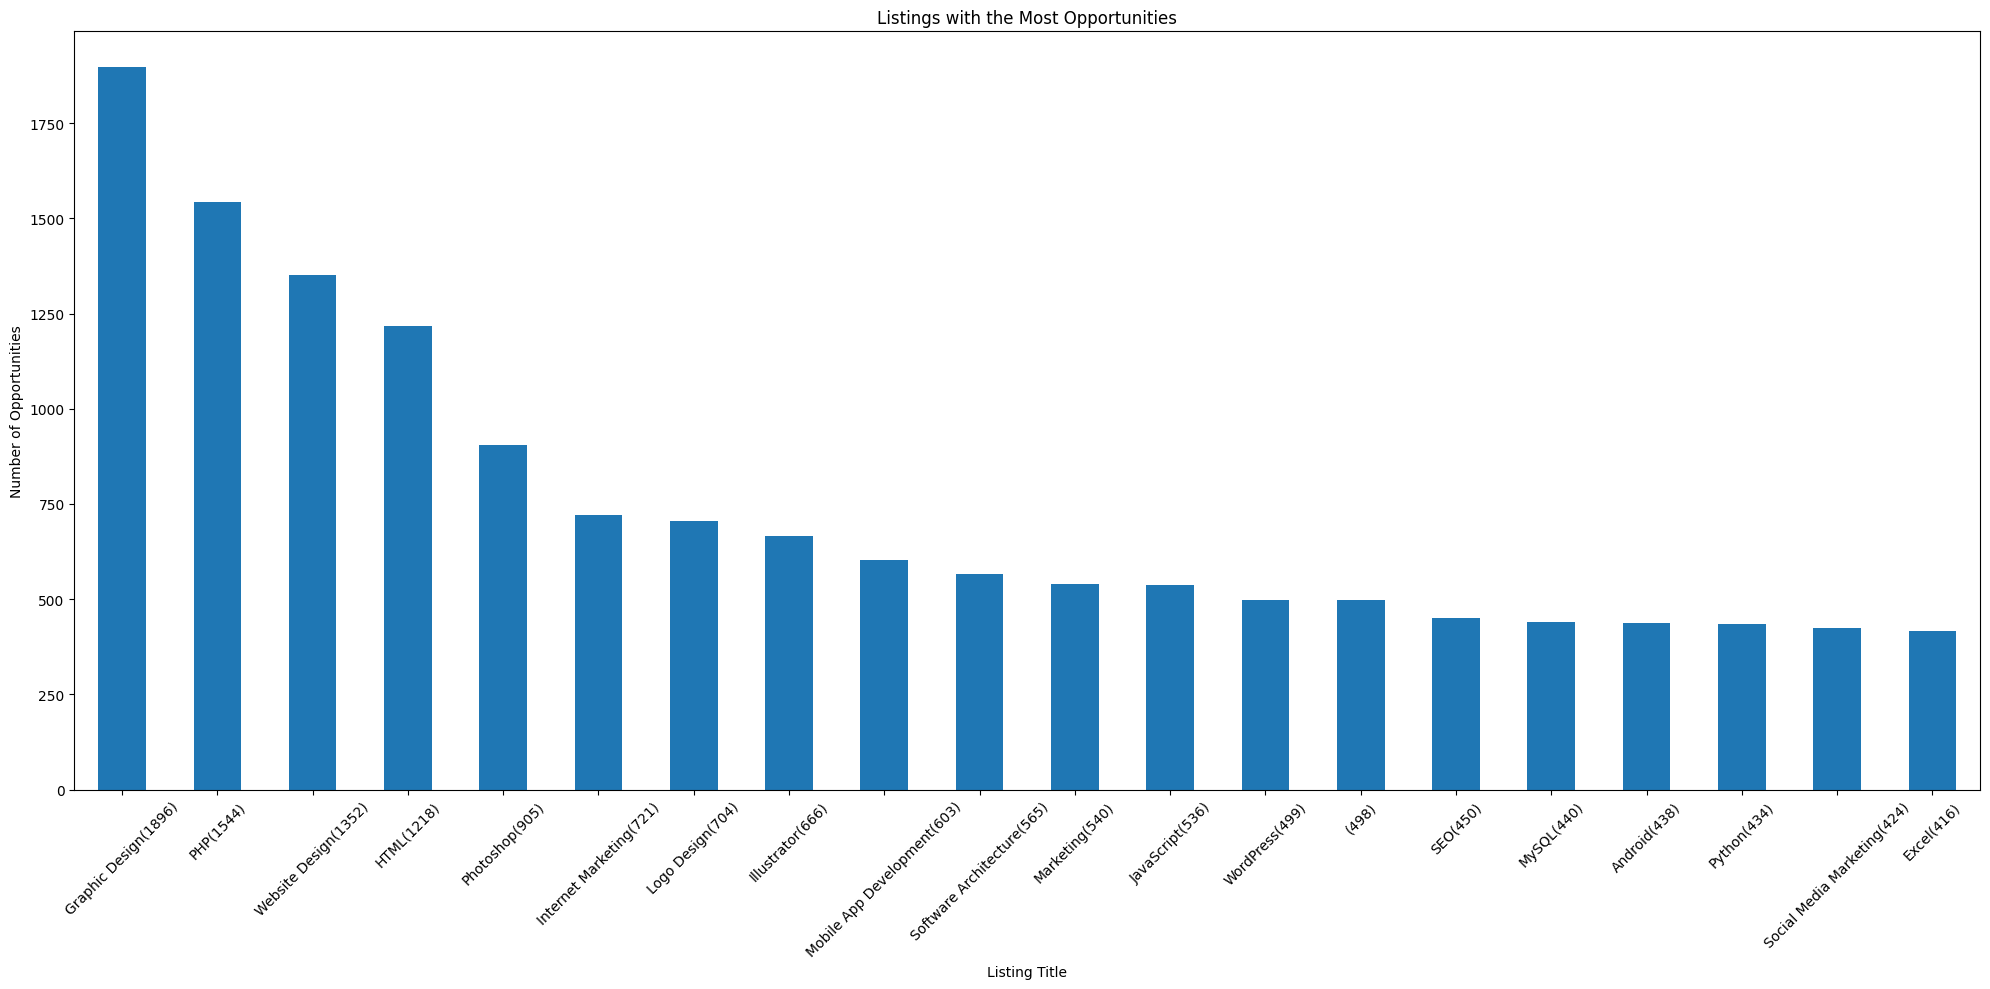

In [14]:
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('freelance.csv')

# Drop the unnecessary link column
df.drop('Links', axis=1, inplace=True)

# Group by Title and sum the Opportunities
grouped_df = df.groupby('Title')['Opportunities'].sum()

# Sort the results in descending order
sorted_df = grouped_df.sort_values(ascending=False)

# Get the top 20 listings with the most opportunities
top_n = 20
top_listings = sorted_df.head(top_n)

# Create a bar chart to visualize the data
top_listings.plot(kind='bar', figsize=(20, 10))
# Adjust figsize as needed for better visualization

# Add a title and labels to the chart
plt.title('Listings with the Most Opportunities')
plt.xlabel('Listing Title')
plt.ylabel('Number of Opportunities')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()  # Adjust layout for better fit
plt.show()